# Plots 

Plots Notebook for reproducibility. The notebook is divided into 2 sections:
- Generated Datasets Visualization
- Generated Sparse Datasets Visualization

## Generated Dataset Visualization

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [3]:
df = pd.read_csv('../data/generated_dense.csv')

In [4]:
df.loc[df['method'] == 'pythonic', 'mean_sequential'] *= 24
df.loc[df['method'] == 'pythonic', 'mean_reinit'] *= 24
df.loc[df['method'] == 'pythonic', 'logMeanTime'] += np.log10(24)
df.loc[df['method'] == 'pythonic', 'logMeanTimeReinit'] += np.log10(24)

In [5]:
matrices = {
    'kendall': {},
}

matrices_sequential = {
    'kendall': {},
    'euclidean': {},
    'pearson': {},
}

labels = {
    'kendall': {},
    'euclidean': {},
    'pearson': {},
}

labels_sequential = {
    'kendall': {},
    'euclidean': {},
    'pearson': {},
}

In [6]:
def fill_missing_values(matrix):
    for i in range(1, 5):
        try:
            matrix.loc[i]
        except:
            print(i)
            matrix.loc[i] = [np.nan, np.nan, np.nan, np.nan, np.nan]
    
    labels = np.round(np.copy(matrix), 1).tolist()
    for i in range(1, 5):
        for j in range(1, 6):
            if i + j <= 7 and np.isnan(matrix.loc[i, j]):
                label_i = i - 1
                label_j = j - 1
                matrix.loc[i, j] = 100
                labels[label_i][label_j] = 'W'
    matrix = matrix.loc[matrix.index[::-1]]
    labels = labels[::-1]
#     print(labels)
    return matrix, labels

In [7]:
for metric in matrices.keys():
    for method in ['CPU', 'GPU', 'amap', 'pythonic', 'pandas', 'factoextra']:
        
#         print(metric, method)
        matrix = df[df.metric == metric]
        matrix_log = matrix[matrix.method == method].pivot('logWX','logWY','logMeanTimeReinit')
        matrix_sequential = matrix[matrix.method == method].pivot('logWX', 'logWY', 'logMeanTime')
        print(metric, method)
        
        matrix, label = fill_missing_values(matrix_log)
        matrix_sequential, label_sequential = fill_missing_values(matrix_sequential)
        
        matrix.index = matrix.index.astype(int)
        matrix.columns = matrix.columns.astype(int)
        
        matrix_sequential.index = matrix_sequential.index.astype(int)
        matrix_sequential.columns = matrix_sequential.columns.astype(int)
        
        matrices_sequential[metric][method] = matrix_sequential
        matrices[metric][method] = matrix
        labels[metric][method] = label
        labels_sequential[metric][method] = label_sequential

kendall CPU
kendall GPU
kendall amap
kendall pythonic
kendall pandas
kendall factoextra


In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
cmap = sns.color_palette('coolwarm', as_cmap=True)

In [11]:
import matplotlib as mpl


In [12]:
def draw_matrix(matrix, ax, title, set_cells=False, set_features=False, annot=None, real=False, fontsize=20, cbar_ax=None, cbar=True,
                label=True):
    ax.set_facecolor('#E5E7E7')
    cmap = sns.color_palette('coolwarm', as_cmap=True).copy()
    cmap.set_over(color='black')
    
    if real:
        vmin = 10 ** 4
        vmax = 10 ** 11
    else:
        vmin = 4
        vmax = 11
    
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    
    if label:
        ll = 'Log10 execution time, $\mu$s'
    else:
        ll = ''
    kwargs={"cbar": cbar, "cbar_ax": cbar_ax, "cbar_kws": {'label': ll}, "linewidths": 1, "linecolor": 'black'}
    print(kwargs)
    if annot is not None:
        plot = sns.heatmap(
            np.round(matrix, 1), ax=ax, cmap=cmap,
            norm=norm,
            annot_kws={"fontsize": fontsize, 'fontweight': 'bold'},
            annot=annot,
            fmt='',
            vmin=vmin,
            vmax=vmax,
            **kwargs,
        )
    else:
        plot = sns.heatmap(
            np.round(matrix, 1), ax=ax, cmap=cmap,
            norm=norm,
            annot_kws={"fontsize":fontsize},
            annot=True,
            fmt='',
            vmin=vmin,
            vmax=vmax,
            **kwargs,
        )
    
    plot.set_title(
        title, fontsize=fontsize * 1.4
    )
    
    fontsize = fontsize
    ax.set_yticklabels(ax.get_yticklabels(), size=fontsize)
    ax.set_xticklabels(ax.get_xticklabels(), size=fontsize)
    if set_cells:
        ax.set_ylabel('Log Cells', fontsize=fontsize * 1.2)
    else:
        ax.set_ylabel('', fontsize=fontsize * 1.2)
        
    if set_features:
        ax.set_xlabel('Log Features', fontsize=fontsize * 1.2)
    else:
        ax.set_xlabel('', fontsize=fontsize * 1.2)
    if cbar:
        cbar = plot.collections[0].colorbar
        cbar.ax.yaxis.label.set_size(fontsize * 1.2)
        cbar.ax.tick_params(labelsize=fontsize * 1.2)
        return cbar

In [13]:
methods = ['amap', 'factoextra', 'pythonic', 'pandas', 'CPU', 'GPU', 'sparse_CPU', 'sparse_GPU']

palette = sns.palettes.color_palette()[:len(methods)]
color_palette = {
    method: pallete for method, pallete in zip(methods, palette)
}

In [14]:
methods = ['amap', 'factoextra', 'pythonic', 'pandas', 'CPU', 'GPU', 'sparse_CPU', 'sparse_GPU']

palette = sns.palettes.color_palette()[:len(methods)]
color_palette = {
    method: pallete for method, pallete in zip(methods, palette)
}

sparse_methods = ['amap', 'factoextra', 'pythonic', 'pandas', 'dense_CPU', 'dense_GPU', 'sparse_CPU', 'sparse_GPU']

palette = sns.palettes.color_palette()[:len(methods)]
sparse_color_palette = {
    method: pallete for method, pallete in zip(sparse_methods, palette)
}

## Heatmaps

{'cbar': True, 'cbar_ax': None, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
{'cbar': True, 'cbar_ax': None, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
{'cbar': True, 'cbar_ax': None, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
{'cbar': True, 'cbar_ax': None, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
{'cbar': True, 'cbar_ax': None, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
{'cbar': True, 'cbar_ax': None, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}


/tmp/ipykernel_124456/2982273799.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('figure-heatmaps.png', bbox_layout='tight', dpi=200)


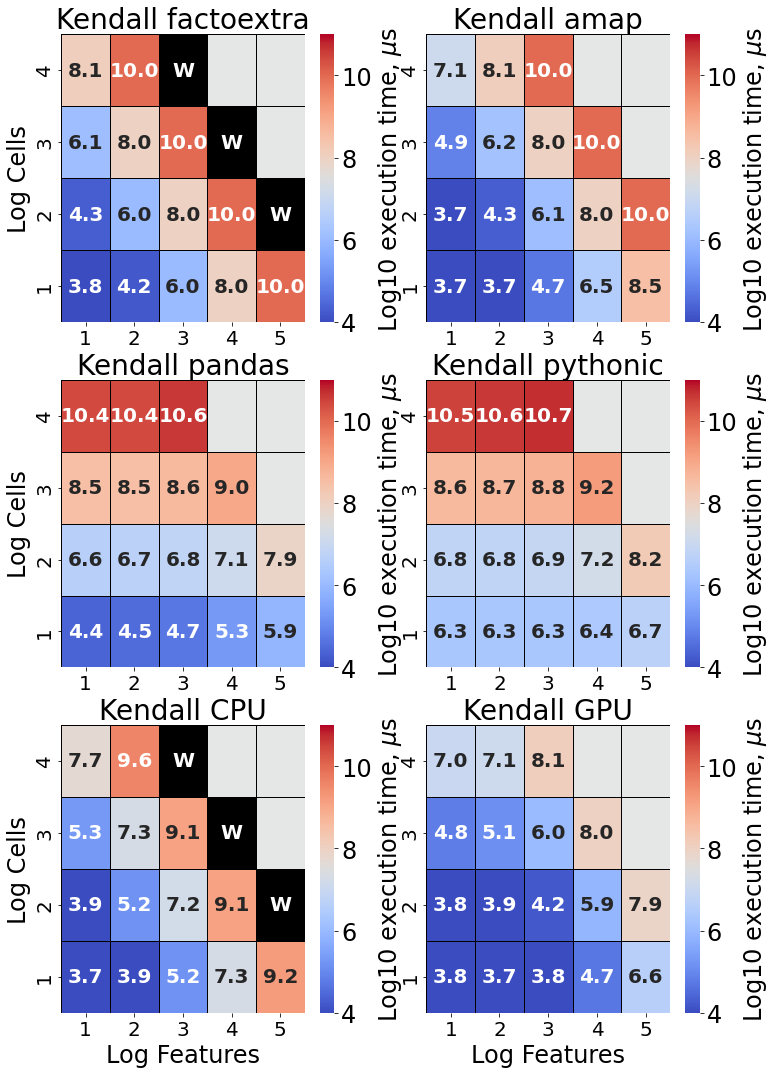

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

for index, metric in enumerate(['kendall']):
    for jndex, method in enumerate(['factoextra', 'amap', 'pandas', 'pythonic', 'CPU', 'GPU']):
        i = jndex // 2
        j = jndex % 2
        set_cells = j == 0
        set_features = i == 2
        draw_matrix(
            matrix=matrices[metric][method],
            title=f'{metric.capitalize()} {method}',
            set_cells=set_cells,
            set_features=set_features,
            annot=labels[metric][method],
            ax=ax[i][j],
        )
        
plt.savefig('figure-heatmaps.png', bbox_layout='tight', dpi=200)

In [16]:
df = df[df['|W|'] > 10000]

In [17]:
hue_order = ['amap', 'factoextra', 'pandas','pythonic','CPU','GPU']

In [18]:
TESTED_METHODS = hue_order

### Checking for wall-timed methods and add the to analysis

In [19]:
df = df[df['|W|'] > 10000]
index = 1000
df_missed = df.copy()

for method in TESTED_METHODS:
    for metric in ['euclidean', 'pearson', 'kendall']:
        for wX in [10, 100, 1000, 10000]:
            for wY in [10, 100, 1000, 10000, 100000]:
                if wX * wY > 10 ** 7 or wX * wY < 10 ** 5:
                    continue
                df_filtered = df[
                    (df.method == method) & (df.wX == wX) & (df.wY == wY) & (df.metric == metric)
                ]
                if df_filtered.shape[0] > 0:
                    continue
                df_missed.loc[index] = {
                    'metric': metric,
                    'method': method,
                    'wX': wX,
                    'wY': wY,
                    'ID': f'{wX}_{wY}',
                    '|W|': wX * wY,
                    'logWX': np.log10(wX),
                    'logWY': np.log10(wY),
                    'logMeanTime': 11.0,
                    'logMeanTimeReinit': 11.0,
                    'mean_reinit': 10 ** 11.0,
                    'mean_sequential': 10 ** 11.0,
                }
                index += 1

In [20]:
df['ID2'] = df['ID']+'_'+df['metric']
df_missed['ID2'] = df_missed['ID'] + '_' + df_missed['metric']

In [21]:
df_grouped = df_missed.groupby(['method'])
acc = df_grouped.get_group(("GPU"))


results = []
for dat in acc.index:
    for ind in df_missed.index:
        if acc["ID2"][dat] == df_missed['ID2'][ind]:
            results.append({
                'DataFile': df_missed['DataFile'][ind],
                'method': df_missed['method'][ind],
                'metric': df_missed['metric'][ind],
                'acceleration_reinit': acc['mean_reinit'][dat]/df_missed['mean_reinit'][ind],
                'acceleration_sequential': acc['mean_sequential'][dat]/df_missed['mean_sequential'][ind],
                'wX': df_missed['wX'][ind],
                'wY': df_missed['wY'][ind],
                'ID': df_missed['ID'][ind],
            })

df_acc = pd.DataFrame(results)

In [22]:
df_acc['logAcceleration_reinit'] = np.log10(df_acc['acceleration_reinit'])
df_acc['logAcceleration_sequential'] = np.log10(df_acc['acceleration_sequential'])
df_acc['|W|'] = df_acc['wX']*df_acc['wY']
df_acc['Method'] = df_acc['metric']+'_'+df_acc['method']

In [23]:
TESTED_METHODS = ["pythonic","pandas","factoextra","amap", "CPU",]

In [24]:
from matplotlib.patches import PathPatch, Rectangle

In [25]:
df.loc[df.method == 'CPU', 'method'] = 'GADES-CPU-dense'
df.loc[df.method == 'GPU', 'method'] = 'GADES-GPU-dense'

df_acc.loc[df_acc.method == 'CPU', 'method'] = 'GADES-CPU-dense'
df_acc.loc[df_acc.method == 'GPU', 'method'] = 'GADES-GPU-dense'

df_missed.loc[df_missed.method == 'CPU', 'method'] = 'GADES-CPU-dense'
df_missed.loc[df_missed.method == 'GPU', 'method'] = 'GADES-GPU-dense'
color_palette['GADES-CPU-dense'] = color_palette['CPU']
color_palette['GADES-GPU-dense'] = color_palette['GPU']

for dataframe in [df, df_acc, df_missed]:
    dataframe.loc[dataframe.method == 'pythonic', 'method'] = 'scipy'
    
color_palette['pythonic'] = 'scipy'

In [26]:
TESTED_METHODS = ['scipy', 'pandas', 'factoextra', 'amap', 'GADES-CPU-dense']

In [27]:
import os

# Figure 3 (all-dense-w + all-dense-acceleration)

In [28]:
def normalize(x):
    
    mapping = [10 ** 5, 10 ** 6, 10 ** 7]
    results = [5, 6, 7]
    
    values = {
        element: value for element, value in zip(mapping, results)
    }
    return f'$10^{values[x]}$'

In [126]:
from copy import copy
from matplotlib.gridspec import GridSpec
from matplotlib.patches import FancyBboxPatch


def plot_figure3(
    name='Reinit', df=df_acc, column='logAcceleration_reinit', matrix=matrices, output_name='figure3.png',
    ylim=(-5, 2),
    plot_baseline=True,
    labels=labels,
    ylabel='Log10 Acceleration',
    plot_heatmap=True,
):
    fig = plt.figure(figsize=(60, 30))
    

    gs = GridSpec(2, 7, figure=fig, height_ratios=[7, 5], width_ratios=[1, 1, 1, 1, 1, 1, 0.1])
    fig.canvas.draw()

    BASE_FONT_SIZE = 23
    SCALE = 1.7

    FONT_SIZE = BASE_FONT_SIZE * SCALE

    metric='kendall'
    
    build_methods = copy(TESTED_METHODS)
    if not plot_baseline:
        build_methods.append('GADES-GPU-dense')

    size_data_filtered = df[df['method'].isin(build_methods)]
    size_data_filtered = size_data_filtered[size_data_filtered.metric == metric]

    size_data_filtered['number_elements'] = size_data_filtered['|W|'].apply(normalize)
    # Second column
    current_ax = fig.add_subplot(gs[0, 0:5])
    print(current_ax)
#     if plot_heatmap:
#         current_ax.text(-0.03, 1.05, 'A', fontdict={'size': BASE_FONT_SIZE * 4}, transform=current_ax.transAxes)
    size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])


    hue = '|W|'
    
    
    
    print(size_data_filtered['method'].unique())
    plot = sns.boxplot(
        ax=current_ax,
        data=size_data_filtered,x='number_elements',hue='method',y=column,
        hue_order=build_methods,
        order=sorted(
            size_data_filtered['number_elements'].unique()
        ),
    #         palette=color_palette,
    )
    if plot_baseline:
        plot.axhline(y=0.0, color='r', linestyle='-',label="GADES-GPU-dense\nbaseline")
    if plot_heatmap:
        current_ax.text(-0.04, 1.1, 'A', fontdict={'size': BASE_FONT_SIZE * 4}, transform=current_ax.transAxes)
    current_ax.legend(fontsize=FONT_SIZE, bbox_to_anchor=(1, 1))

    plot.set_title(name, fontsize=FONT_SIZE * 1.8)
    plot.set_xlabel('', fontsize=FONT_SIZE)

    ylabel = ylabel
    plot.set_ylabel(ylabel, fontsize=FONT_SIZE * 1.2)
    current_ax.tick_params(labelsize=FONT_SIZE * 1.2)
    current_ax.yaxis.grid(True)
    plot.set_ylim(*ylim)
    plot.set_xticklabels(plot.get_xticklabels(), fontsize=FONT_SIZE * 1.2)

    bbox = current_ax.get_tightbbox(fig.canvas.get_renderer())
    x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds
    # slightly increase the very tight bounds:
    xpad = 0.05 * width
    ypad = 0.05 * height
    fig.add_artist(
        FancyBboxPatch(
            (x0- 0.5 * xpad, y0 + 0.4 * ypad), width + 2.4 * xpad, height+ 0.4 * ypad, edgecolor='black', linewidth=4, fill=False,
            boxstyle='round,pad=-0.0040,rounding_size=0.02',
            mutation_aspect=2,
        )
    )

    if plot_heatmap:
        current_ax = fig.add_subplot(gs[1, 0:7])
    
        bbox = current_ax.get_tightbbox(fig.canvas.get_renderer())
        x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds
        # slightly increase the very tight bounds:
        xpad = 0.05 * width
        ypad = 0.05 * height
        fig.add_artist(
            FancyBboxPatch(
                (x0- 1.1 * xpad, y0 - 4 * ypad), width+ 2 * xpad, height+ 6.8 * ypad, edgecolor='black', linewidth=4, fill=False,
                boxstyle='round,pad=-0.0040,rounding_size=0.02',
                mutation_aspect=2,
            )
        )

        current_ax.tick_params(axis='both',which='both',bottom=0,left=0,
                    labelbottom=0, labelleft=0)
        current_ax.axis('off')
        cbar_ax = fig.add_subplot(gs[1, 6])

        for jndex, method in enumerate(['factoextra', 'pandas', 'CPU', 'amap', 'pythonic', 'GPU']):
            current_ax = fig.add_subplot(gs[1, jndex])
            set_cells = jndex == 0
            set_features = True
            cbar = jndex == 5
            if method == 'CPU':
                method_name = 'GADES-CPU-dense'
            elif method == 'GPU':
                method_name = 'GADES-GPU-dense'
            elif method == 'pythonic':
                method_name = 'scipy'
            else:
                method_name = method

            cbar = draw_matrix(
                matrix=matrices[metric][method],
                title=method_name,
                set_cells=set_cells,
                set_features=set_features,
                annot=labels[metric][method],
                ax=current_ax,
                fontsize=BASE_FONT_SIZE * 1.4,
                cbar=cbar,
                cbar_ax=cbar_ax,
            )

            if jndex == 0:
                current_ax.text(-0.24, 1.07, 'B', fontdict={'size': BASE_FONT_SIZE * 4}, transform=current_ax.transAxes)
        fig.subplots_adjust(hspace = 0.5)

    
    plt.savefig(output_name, dpi=200, bbox_inches='tight')

AxesSubplot(0.125,0.479621;0.617893x0.400379)
['amap' 'pandas' 'scipy' 'GADES-CPU-dense' 'factoextra']
{'cbar': False, 'cbar_ax': <AxesSubplot:>, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
{'cbar': False, 'cbar_ax': <AxesSubplot:>, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
{'cbar': False, 'cbar_ax': <AxesSubplot:>, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
{'cbar': False, 'cbar_ax': <AxesSubplot:>, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
{'cbar': False, 'cbar_ax': <AxesSubplot:>, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
{'cbar': True, 'cbar_ax': <AxesSubplot:>, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}


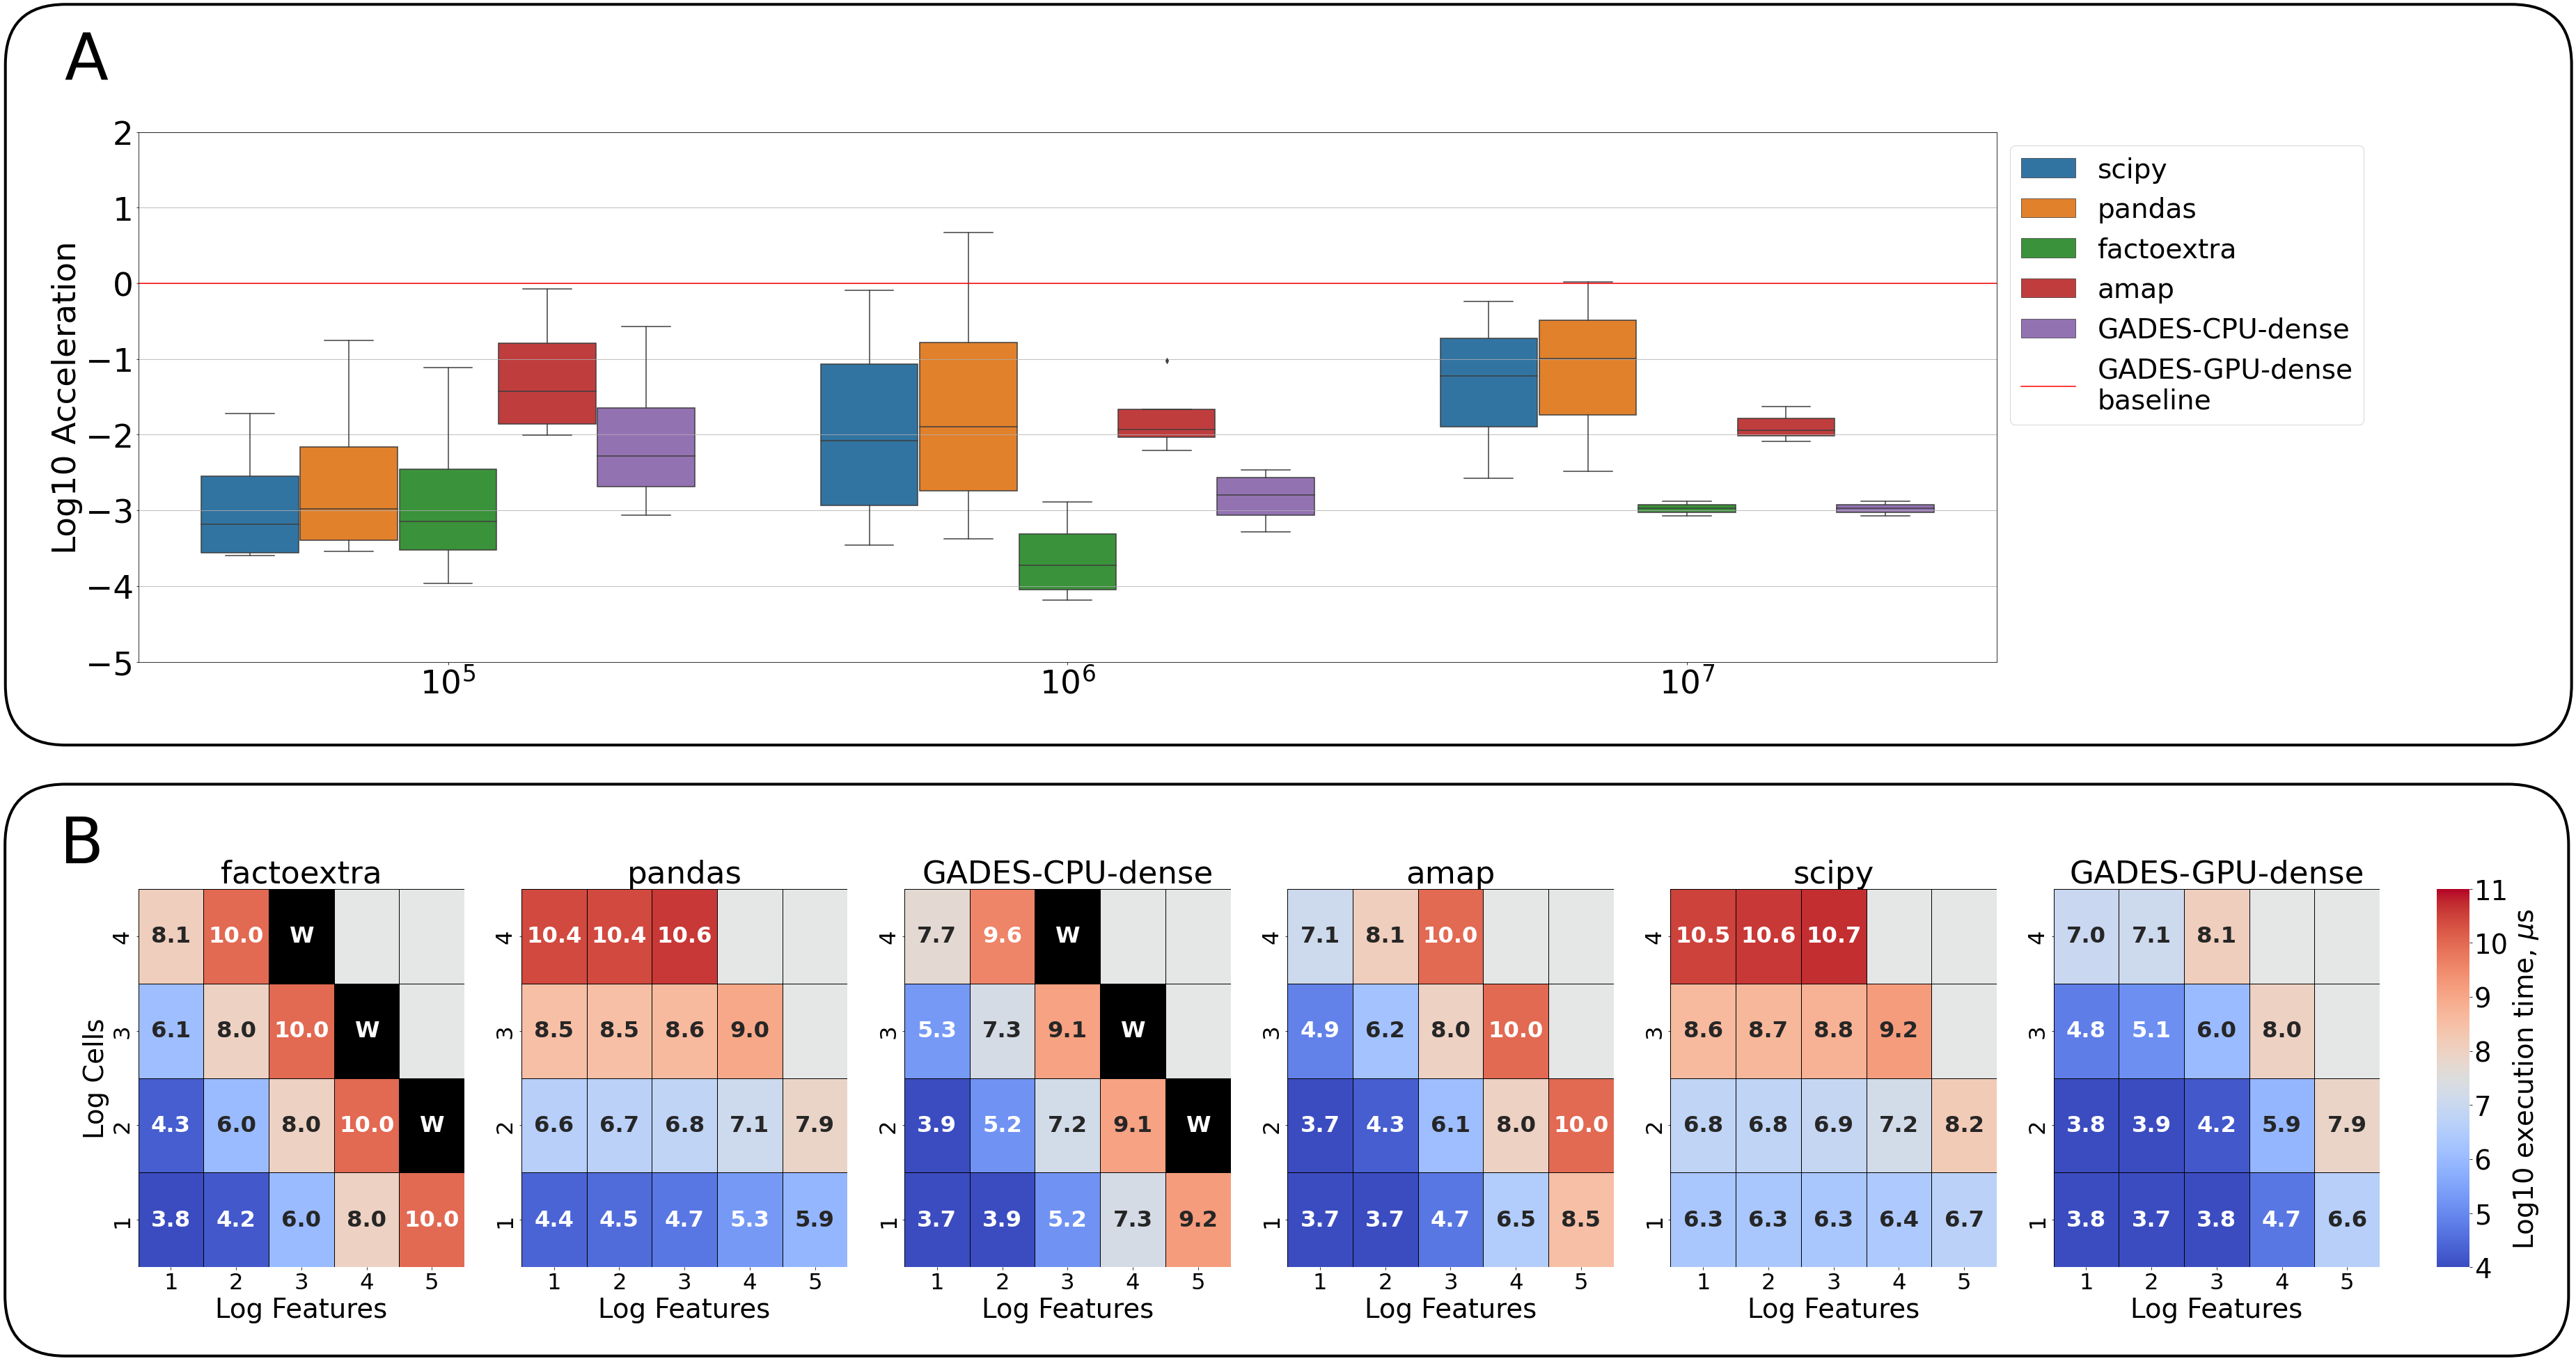

In [127]:
plot_figure3(
    name='',
    output_name='figure3.png',
    df=df_acc,
    column='logAcceleration_sequential'
)

AxesSubplot(0.125,0.479621;0.617893x0.400379)
['amap' 'pandas' 'scipy' 'GADES-CPU-dense' 'factoextra']
False
{'cbar': False, 'cbar_ax': <AxesSubplot:>, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
False
{'cbar': False, 'cbar_ax': <AxesSubplot:>, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
False
{'cbar': False, 'cbar_ax': <AxesSubplot:>, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
False
{'cbar': False, 'cbar_ax': <AxesSubplot:>, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
False
{'cbar': False, 'cbar_ax': <AxesSubplot:>, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}
True
{'cbar': True, 'cbar_ax': <AxesSubplot:>, 'cbar_kws': {'label': 'Log10 execution time, $\\mu$s'}, 'linewidths': 1, 'linecolor': 'black'}


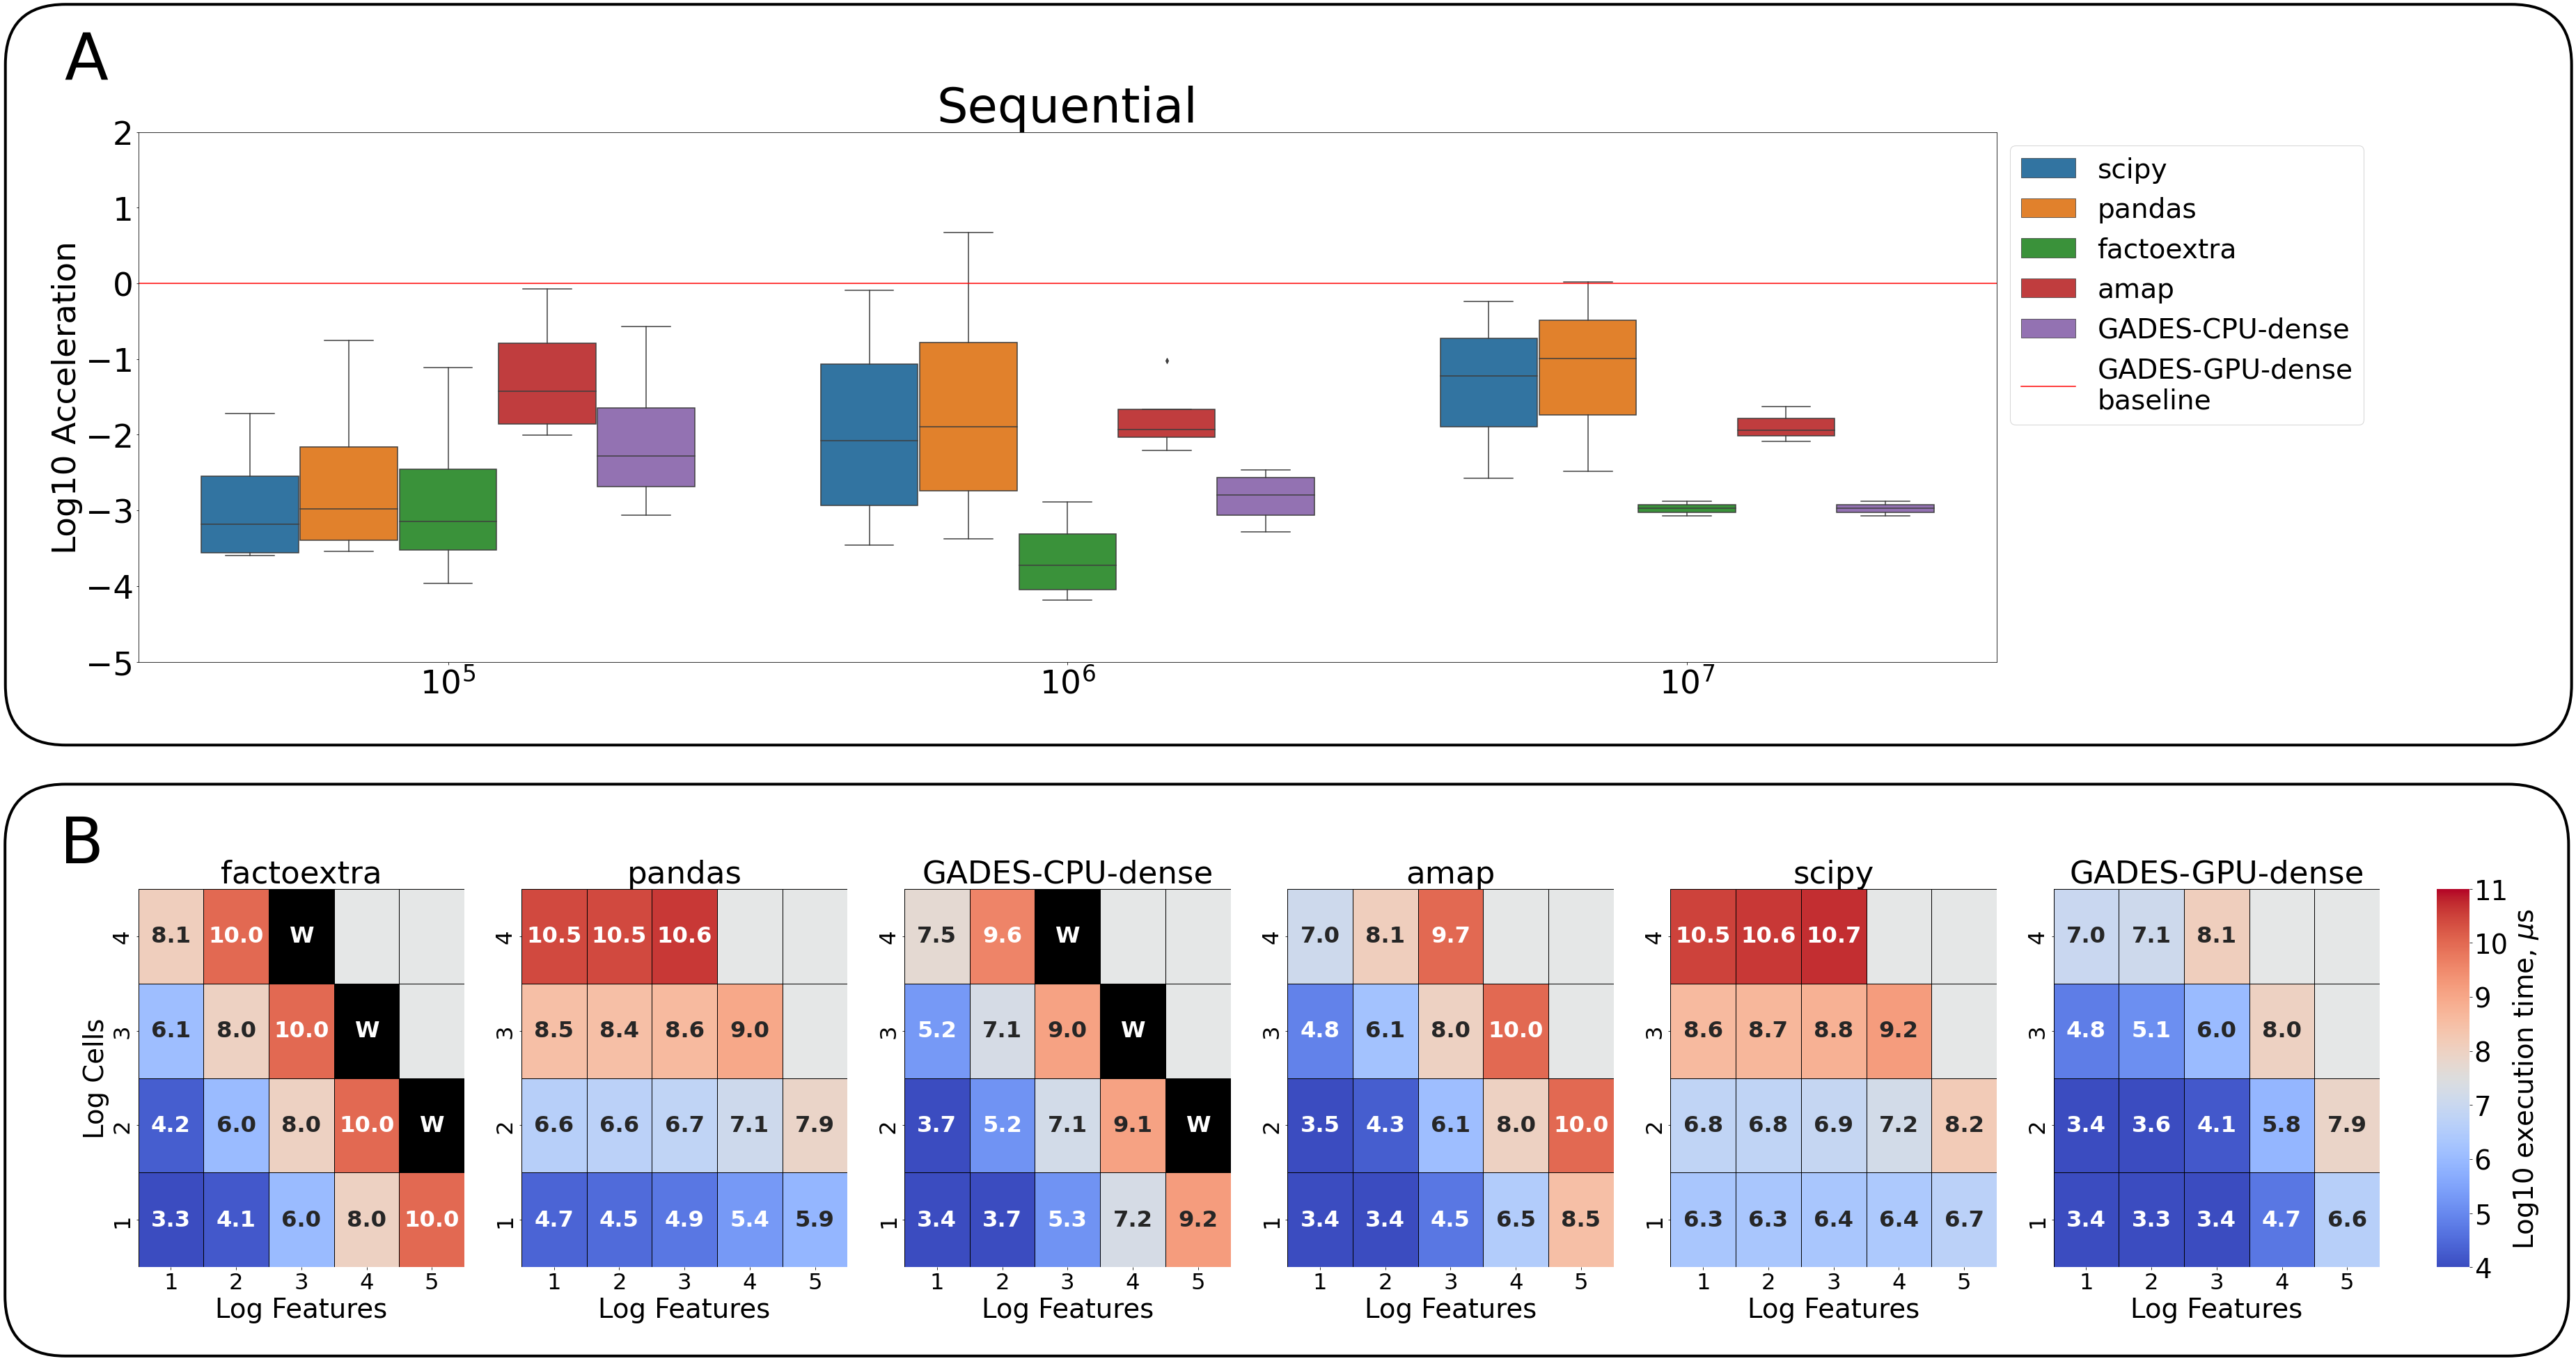

In [120]:
plot_figure3(
    name='Sequential',
    output_name='figure3-sequential.png',
    df=df_acc,
    column='logAcceleration_sequential',
    labels=labels_sequential,
    ylabel='Log10 Acceleration'
)

AxesSubplot(0.125,0.479621;0.617893x0.400379)
['amap' 'pandas' 'scipy' 'GADES-CPU-dense' 'factoextra']


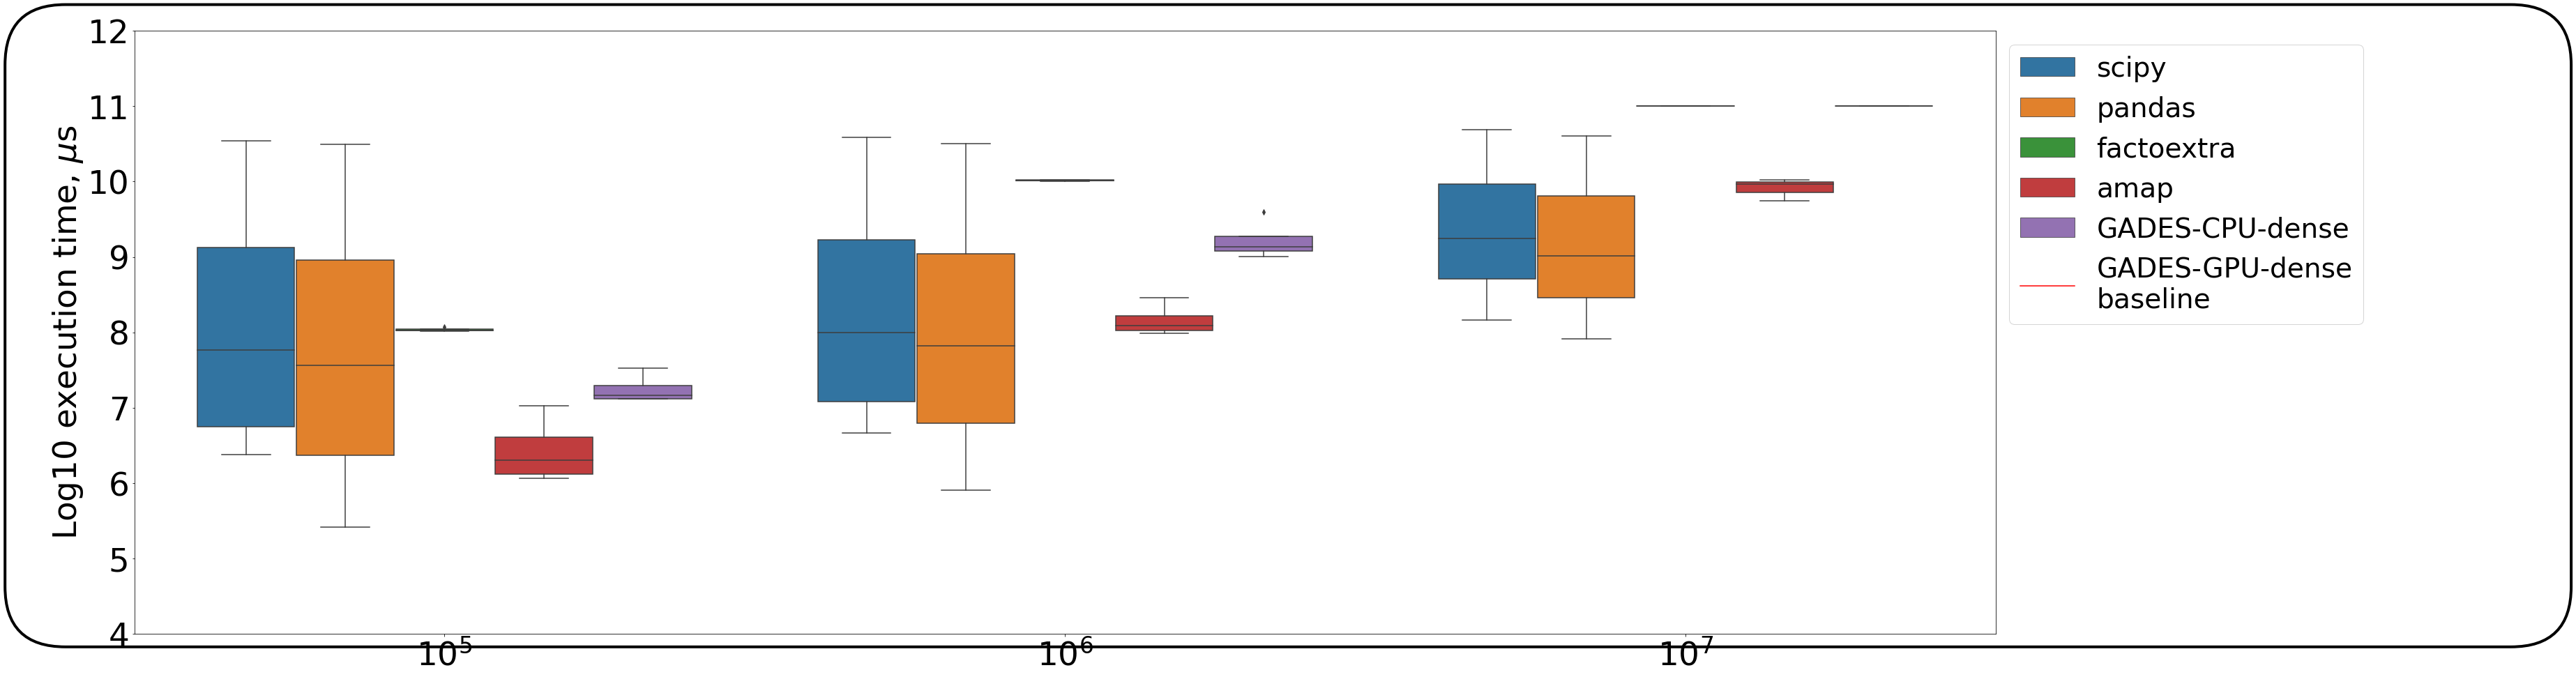

In [121]:
plot_figure3(
    name='',
    output_name='figure3-barplot-sequential.png',
    df=df_missed,
    column='logMeanTime',
    ylim=(4, 12),
    plot_heatmap=False,
    ylabel='Log10 execution time, $\mu$s'
)

## Generated Sparse Visualization

In [129]:
df_sparse = pd.read_csv('../data/sparse_generated.csv')

In [130]:
from matplotlib.colors import BoundaryNorm
cmap = sns.color_palette('coolwarm', as_cmap=True)
cmap.N
norm_p      = BoundaryNorm(np.linspace(3, 11.0, 19), ncolors=cmap.N, clip=True)
norm_s      = BoundaryNorm(np.linspace(0, 1.0, 19), ncolors=cmap.N, clip=True)

In [131]:
import os

In [132]:
df_sparse['logW'] = np.log10(df_sparse['|W|'])

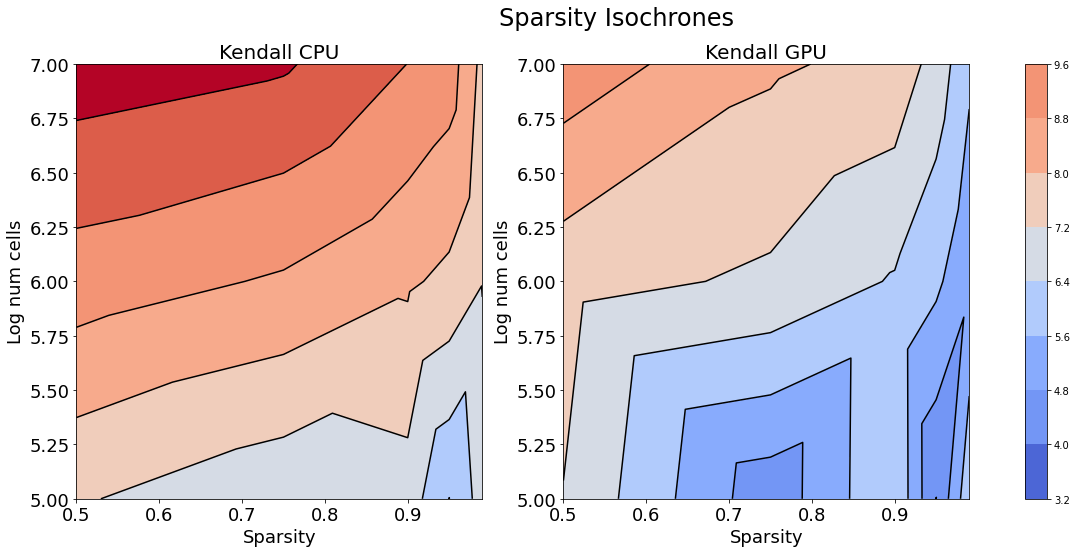

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle(f'Sparsity Isochrones', fontsize=24)

for index, metric in enumerate(['Kendall']):
    for jndex, method in enumerate(['CPU', 'GPU']):
        metric_lower = metric.lower()
        current_dfr = df_sparse[(df_sparse.method == method) & (df_sparse.metric == metric_lower)]
        current_axis = ax[jndex]
        current_axis.set_title(f'{metric} {method}', fontsize=20)
        
        current_axis.set_xlabel('Sparsity', fontsize=18)
        current_axis.set_ylabel('Log num cells', fontsize=18)
        current_axis.tick_params(axis='x', labelsize=18)
        current_axis.tick_params(axis='y', labelsize=18)
        tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.logMeanTimeReinit, norm=norm_p, cmap=cmap)
        contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.logMeanTimeReinit, colors='k', norm=norm_p)
        
fig.colorbar(tcf, ax=ax)
plt.savefig(f'all-sparse-isochrones.png', bbox_inches='tight', dpi=200)

In [134]:
expanded_dfs = []
for sparsity in [0.5, 0.75, 0.9, 0.95, 0.99]:
    df_expanded = df_missed.copy()
    df_expanded['sparsity'] = sparsity
    df_expanded['mode'] = 'dense'
    expanded_dfs.append(df_expanded)

df_expanded = pd.concat(expanded_dfs)
df_sparse['mode'] = 'sparse'

df_expanded.loc[df_expanded['method'] == 'GPU', 'method'] = 'GADES-GPU-dense'
df_expanded.loc[df_expanded['method'] == 'CPU', 'method'] = 'GADES-CPU-dense'

df_sparse.loc[df_sparse.method == 'GPU', 'method'] = 'GADES-GPU-sparse'
df_sparse.loc[df_sparse.method == 'CPU', 'method'] = 'GADES-CPU-sparse'



In [135]:
df_all = df_sparse[df_sparse['|W|'] > 10000]

In [136]:
df_united = pd.concat([df_expanded, df_sparse])
df_united = df_united.reset_index()

In [137]:
df_united['mode'].unique()

array(['dense', 'sparse'], dtype=object)

In [138]:
df_united['full_name'] = df_united.apply(
    lambda x: f'{x["wX"]}_{x["wY"]}_{x["sparsity"]}_{x["metric"]}', axis=1
)

In [139]:
def get_full_mode(x):
    if x['method'] in ['GADES-CPU', 'GADES-GPU'] and x['mode'] == 'sparse':
        return f"{x['method']}-{x['mode']}"
    else:
        return x['method']

In [140]:
df_united.loc[df_united['method'] == 'pythonic', 'method'] = 'scipy'

In [141]:
df_grouped = df_united.groupby(['method', 'mode'])
acc = df_grouped.get_group(("GADES-GPU-dense", 'dense'))
v1 =  df_grouped.get_group(("GADES-CPU-dense", 'dense'))

results = []
for dat in acc.index:
    for ind in df_united.index:
        if acc["full_name"][dat] == df_united['full_name'][ind]:
            results.append({
                'DataFile': df_united['DataFile'][ind],
                'method': df_united['method'][ind],
                'metric': df_united['metric'][ind],
                'acceleration_reinit': acc['mean_reinit'][dat]/df_united['mean_reinit'][ind],
                'acceleration_sequential': acc['mean_sequential'][dat]/df_united['mean_sequential'][ind],
                'wX': df_united['wX'][ind],
                'wY': df_united['wY'][ind],
                'ID': df_united['ID'][ind],
                'sparsity': df_united['sparsity'][ind],
                'mode': df_united['mode'][ind],
            })

df_acc_sparse = pd.DataFrame(results)
df_acc_sparse['logAcceleration_reinit'] = np.log10(df_acc_sparse['acceleration_reinit'])
df_acc_sparse['logAcceleration_sequential'] = np.log10(df_acc_sparse['acceleration_sequential'])
df_acc_sparse['full_mode'] = df_acc_sparse.apply(get_full_mode, axis=1)

In [142]:
df_acc_sparse['full_mode'].unique()

array(['pandas', 'amap', 'factoextra', 'scipy', 'GADES-CPU-dense',
       'GADES-GPU-dense', 'GADES-GPU-sparse', 'GADES-CPU-sparse'],
      dtype=object)

In [143]:
sparse_methods = [
    'amap',
    'factoextra',
    'scipy',
    'pandas',
    'GADES-CPU-dense',
    'GADES-GPU-dense',
    'GADES-CPU-sparse',
    'GADES-GPU-sparse',
]

In [144]:
sparse_color_palette['GADES-CPU-dense'] = sparse_color_palette['dense_CPU']
sparse_color_palette['GADES-GPU-dense'] = sparse_color_palette['dense_GPU']
sparse_color_palette['GADES-CPU-sparse'] = sparse_color_palette['sparse_CPU']
sparse_color_palette['GADES-GPU-sparse'] = sparse_color_palette['sparse_GPU']

In [145]:
sparse_color_palette['scipy'] = sparse_color_palette['pythonic']

## Figure 4

In [146]:
sparse_methods

['amap',
 'factoextra',
 'scipy',
 'pandas',
 'GADES-CPU-dense',
 'GADES-GPU-dense',
 'GADES-CPU-sparse',
 'GADES-GPU-sparse']

In [147]:
df_acc_sparse.columns

Index(['DataFile', 'method', 'metric', 'acceleration_reinit',
       'acceleration_sequential', 'wX', 'wY', 'ID', 'sparsity', 'mode',
       'logAcceleration_reinit', 'logAcceleration_sequential', 'full_mode'],
      dtype='object')

In [148]:
TESTED_METHODS

['scipy', 'pandas', 'factoextra', 'amap', 'GADES-CPU-dense']

In [152]:
def plot_figure4(df, column, output_name, name, ylim=(-5, 3), plot_baseline=True, ylabel='Log10 Acceleration'):
    df_united['full_mode'] = df_united.apply(get_full_mode, axis=1)

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(55, 15))
    
    BASE_FONT_SIZE = 23
    SCALE = 2
    FONT_SIZE = BASE_FONT_SIZE * 1.5

    df['num_elements'] = df['wX'] * df['wY']
    num_elements = sorted(list(df['num_elements'].unique()))

    metric = 'kendall'
    base_methods = ['GADES-CPU-dense', 'GADES-CPU-sparse', 'GADES-GPU-sparse']
    
    if not plot_baseline:
        base_methods = ['scipy', 'pandas', 'factoextra', 'amap','GADES-GPU-dense', 'GADES-CPU-sparse', 'GADES-GPU-sparse']
    
    for jndex, num_count in enumerate(num_elements):

        filtered_data = df[(df['metric'] == metric) & (df.num_elements == num_count)]

        current_ax = ax[jndex]

        plot = sns.boxplot(
            ax=current_ax,
            x='sparsity', y=column,
            hue='full_mode', data=filtered_data,
            hue_order=base_methods,
            palette=sparse_color_palette,
        )
        if plot_baseline:
            plot.axhline(y=0.0, color='r', linestyle='-',label="GADES-GPU-dense\nbaseline", linewidth=3)
        sns.move_legend(current_ax, "upper left", bbox_to_anchor=(1, 1))
        plot.set_title(f'$|W| = 10^{np.log10(num_count).astype(int)}$', fontsize=FONT_SIZE * 2)
        plot.set_xlabel('Sparsity degree', fontsize=FONT_SIZE * 1.5)

        ylabel = ylabel if jndex == 0 else ''
        plot.set_ylabel(ylabel, fontsize=FONT_SIZE * 1.5)
        current_ax.tick_params(labelsize=FONT_SIZE * 1.5)
        current_ax.yaxis.grid(True)


        print(metric)
        if jndex < 2:
            plot.get_legend().set_visible(False)
            plot.set_ylim(*ylim)
        else:
            current_ax.legend(fontsize=FONT_SIZE, bbox_to_anchor=(1, 1))
            plot.set_ylim(*ylim)

    fig.suptitle(name, size=BASE_FONT_SIZE * 3, y=1.05)
    plt.savefig(output_name, dpi=200,  bbox_inches = 'tight')

In [153]:
df_acc_sparse.columns

Index(['DataFile', 'method', 'metric', 'acceleration_reinit',
       'acceleration_sequential', 'wX', 'wY', 'ID', 'sparsity', 'mode',
       'logAcceleration_reinit', 'logAcceleration_sequential', 'full_mode',
       'num_elements'],
      dtype='object')

kendall
kendall
kendall


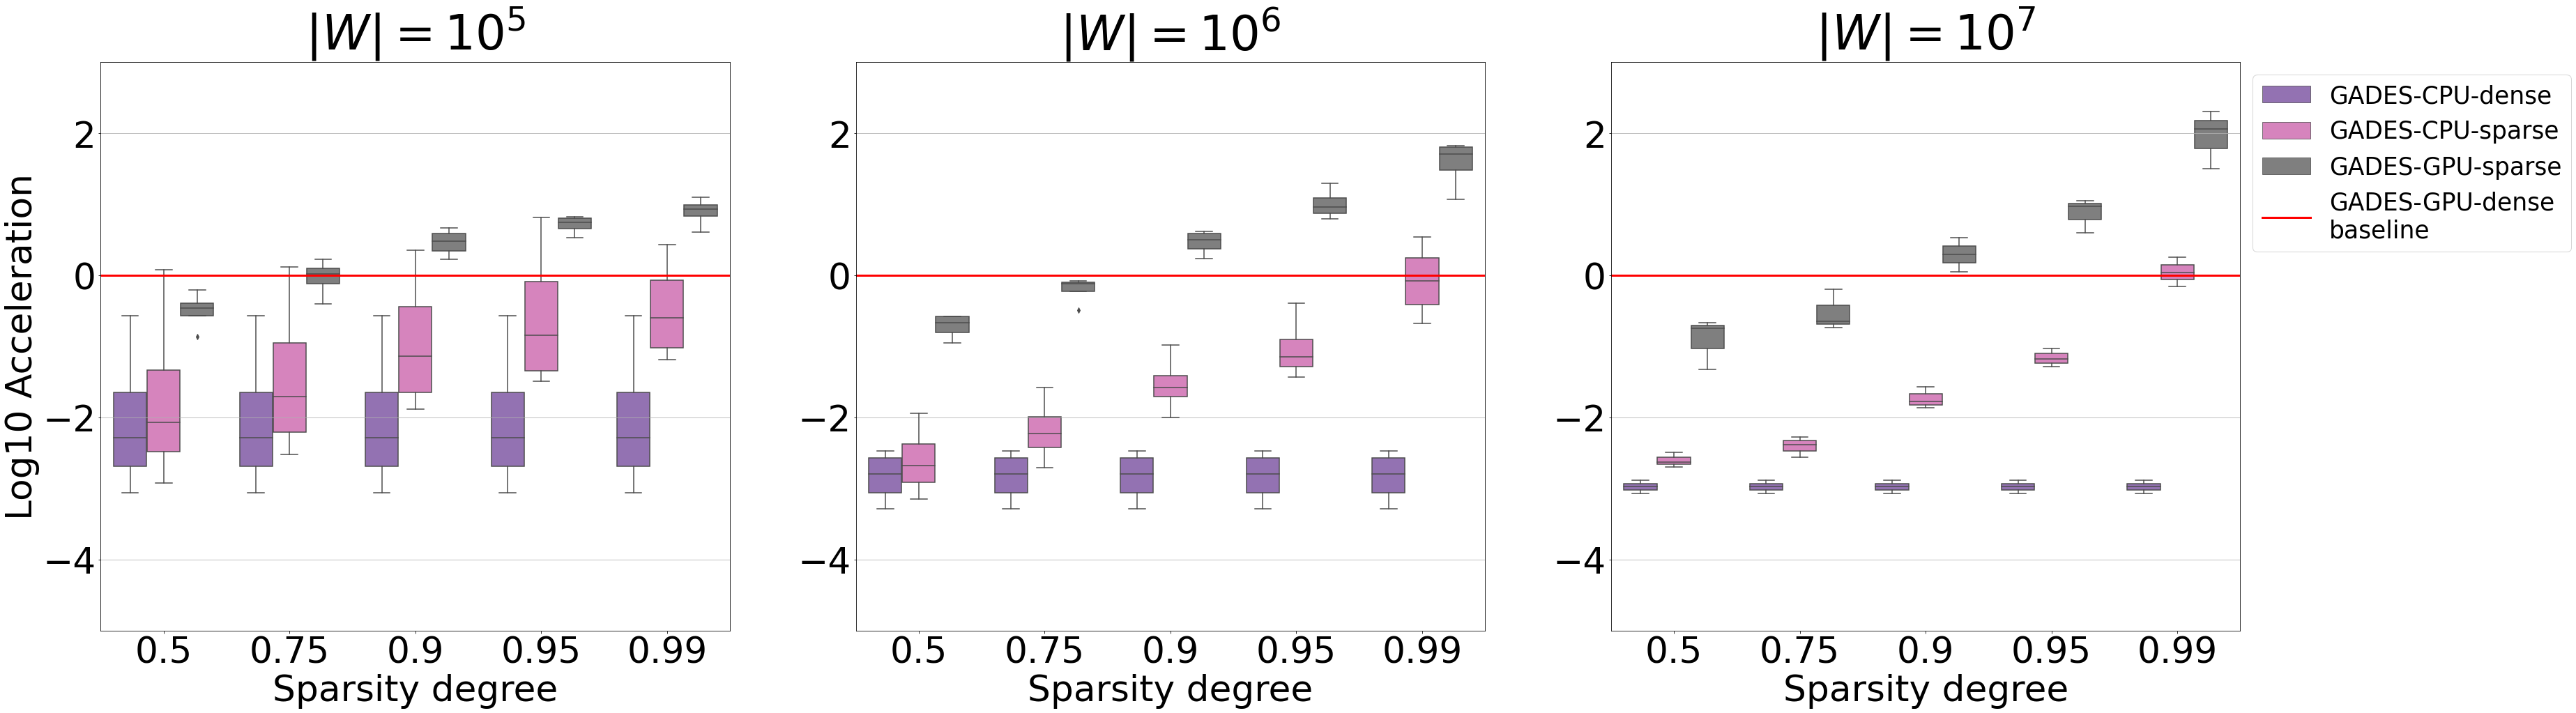

In [154]:
plot_figure4(
    df_acc_sparse,
    column='logAcceleration_sequential',
    output_name='figure4.png',
    name='',
)

In [96]:
df_united[df_united.metric == 'kendall']['|W|'].unique()

array([ 1000000, 10000000,   100000])

/tmp/ipykernel_114939/542456051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united['full_mode'] = df_united.apply(get_full_mode, axis=1)
/tmp/ipykernel_114939/542456051.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_elements'] = df['wX'] * df['wY']


kendall
kendall
kendall


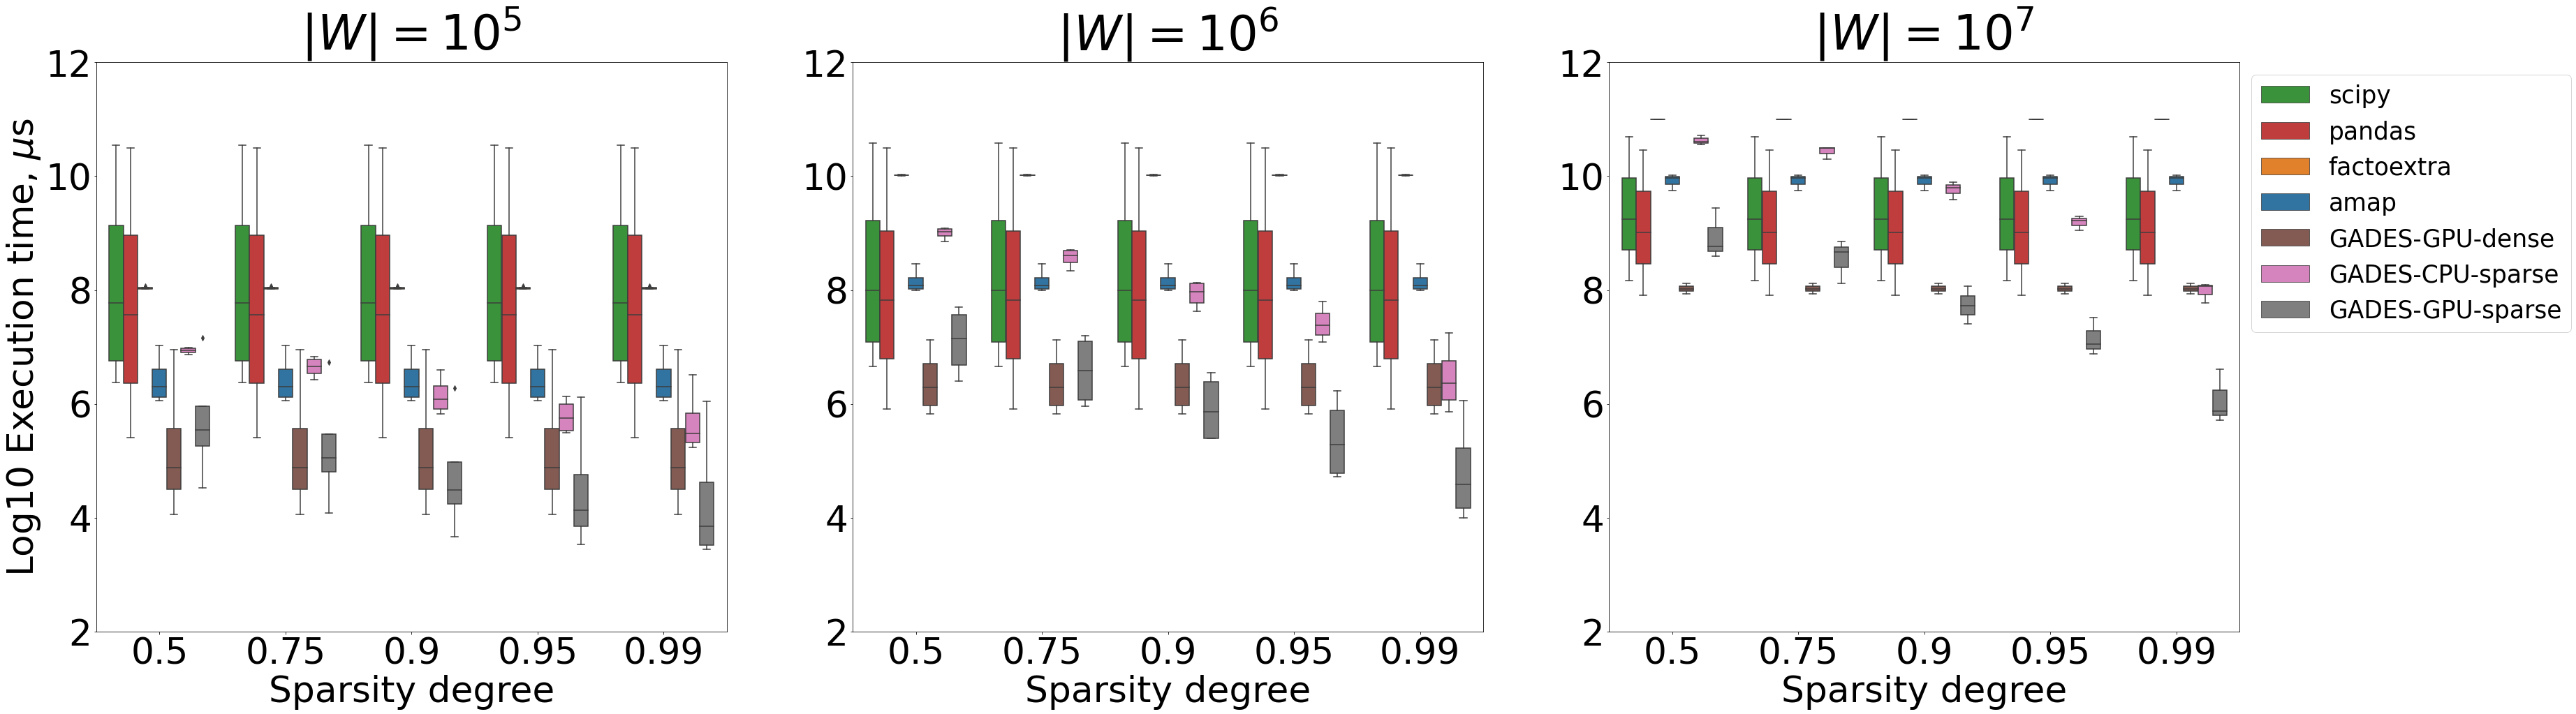

In [93]:
plot_figure4(
    df_united,
    column='logMeanTime',
    output_name='figure4-barplot-sequential.png',
    ylim=(2, 12),
    plot_baseline=False,
    name='',
    ylabel='Log10 Execution time, $\mu$s'
)

## Calculating accelerations

In [84]:
def get_join_mode(x):
    if x['mode'] == 'dense':
        return x['full_mode']
    else:
        return f"{x['full_mode']}_{x['sparsity']}"

In [85]:
def get_w_join_mode(x):
    if x['mode'] == 'dense':
        return f"{x['full_mode']}_{x['|W|']}"
    else:
        return f"{x['full_mode']}_{x['|W|']}_{x['sparsity']}"

In [86]:
def get_w_all_join_mode(x):
    if x['mode'] == 'dense':
        return f"{x['full_mode']}_{x['|W|']}"
    else:
        return f"{x['full_mode']}_{x['|W|']}"

In [87]:
df_united.head()

,index,DataFile,metric,method,wX,wY,ID,|W|,logWX,logWY,...,val_23,val_24,val_25,ID2,sparsity,mode,logW,full_name,full_mode,num_elements
0,60,results/GeneratedDense/10_cells_100000_feature...,euclidean,amap,10,100000,10_100000,1000000,1.0,5.0,...,24399.75,23898.75,23800.75,10_100000_euclidean,0.5,dense,NaN,10_100000_0.5_euclidean,amap,1000000
1,61,results/GeneratedDense/10_cells_100000_feature...,kendall,pandas,10,100000,10_100000,1000000,1.0,5.0,...,NaN,NaN,NaN,10_100000_kendall,0.5,dense,NaN,10_100000_0.5_kendall,pandas,1000000
2,62,results/GeneratedDense/10_cells_100000_feature...,pearson,GADES-GPU-dense,10,100000,10_100000,1000000,1.0,5.0,...,19024.75,19280.00,18949.00,10_100000_pearson,0.5,dense,NaN,10_100000_0.5_pearson,GADES-GPU-dense,1000000
3,63,results/GeneratedDense/10_cells_100000_feature...,pearson,pandas,10,100000,10_100000,1000000,1.0,5.0,...,NaN,NaN,NaN,10_100000_pearson,0.5,dense,NaN,10_100000_0.5_pearson,pandas,1000000
4,64,results/GeneratedDense/10_cells_100000_feature...,kendall,amap,10,100000,10_100000,1000000,1.0,5.0,...,NaN,NaN,NaN,10_100000_kendall,0.5,dense,NaN,10_100000_0.5_kendall,amap,1000000


In [88]:
df_united = df_united[df_united.metric == 'kendall']

In [114]:
df_united['metric'].unique()

array(['kendall'], dtype=object)

In [115]:
df_united['join_mode'] = df_united.apply(get_join_mode, axis=1)

/tmp/ipykernel_58726/3019617803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united['join_mode'] = df_united.apply(get_join_mode, axis=1)


In [116]:
df_united['join_w_mode'] = df_united.apply(get_w_join_mode, axis=1)

/tmp/ipykernel_58726/2209411594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united['join_w_mode'] = df_united.apply(get_w_join_mode, axis=1)


In [117]:
df_united['join_w_all_mode'] = df_united.apply(get_w_all_join_mode, axis=1)

/tmp/ipykernel_58726/2961972645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united['join_w_all_mode'] = df_united.apply(get_w_all_join_mode, axis=1)


In [118]:
mean_values = df_united.groupby(['join_mode', 'metric']).median()['mean_sequential'].reset_index()

In [119]:
acceleration_medians = mean_values.pivot(index='join_mode', columns='metric', values='mean_sequential')

In [120]:
def get_acceleration(src='GADES-GPU-dense', dst='factoextra'):
    return acceleration_medians.loc[dst, 'kendall'] / acceleration_medians.loc[src, 'kendall']

In [121]:
get_acceleration()

2772.866693530978

In [122]:
get_acceleration('GADES-GPU-dense', 'GADES-CPU-dense')

343.90433517091867

In [123]:
get_acceleration('GADES-GPU-dense', 'scipy')

122.34611581235981

In [124]:
get_acceleration('GADES-GPU-dense', 'pandas')

75.13488115776062

In [125]:
mean_w_values = df_united.groupby(['join_w_mode', 'metric']).median()['mean_sequential'].reset_index()
acceleration_medians = mean_w_values.pivot(index='join_w_mode', columns='metric', values='mean_sequential')

In [126]:
get_acceleration(src='GADES-CPU-sparse_1000000_0.99', dst='GADES-CPU-dense_1000000')

525.2534849713944

In [127]:
get_acceleration(src='GADES-CPU-sparse_10000000_0.99', dst='GADES-CPU-dense_10000000')

845.5703817438808

In [128]:
mean_w_values = df_united.groupby(['join_w_all_mode', 'metric']).median()['mean_sequential'].reset_index()
acceleration_medians = mean_w_values.pivot(index='join_w_all_mode', columns='metric', values='mean_sequential')

In [129]:
get_acceleration(src='GADES-CPU-sparse_100000', dst='GADES-CPU-dense_100000',)

6.837899161989963

In [130]:
get_acceleration(src='GADES-CPU-sparse_1000000', dst='GADES-CPU-dense_1000000',)

14.125211637350812

In [131]:
get_acceleration(src='GADES-CPU-sparse_10000000', dst='GADES-CPU-dense_10000000',)

15.9686965450004